In [4]:
import numpy as np
import cv2
from skimage.segmentation import slic,mark_boundaries
from skimage.measure import regionprops
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import imageio

In [5]:
path="0002.jpg"
image = imageio.imread(path)  # reading the image

In [6]:
superpixels=slic(image,80,sigma=4)  # getting the segments/superpixel from the image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


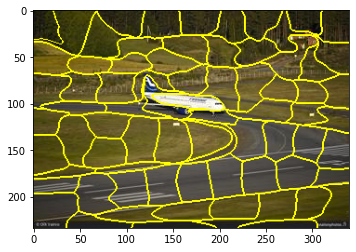

In [7]:
# plotting the superpixels
plt.imshow(mark_boundaries(image,superpixels))
plt.show()

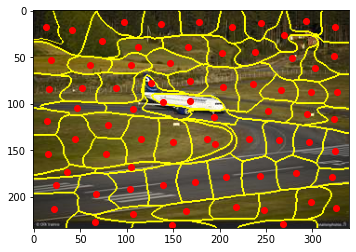

In [9]:
# plotting along with the centroids
regions=regionprops(superpixels+1, intensity_image=image)
for props in regions:
    cy, cx = props.centroid
    plt.plot(cx, cy, 'ro')
plt.imshow(mark_boundaries(image,superpixels))
plt.show()

In [10]:
# creating list that would contain the location and the colour of the superpixels
spl=[]  # contains location
spc=[]  # contains colour
for re in regions:
    x, y = re.centroid
    x,y=int(x),int(y)
    spl.append([x,y])
    spc.append(image[x][y])  # assuming the colour of the superpixel same as that of the centroid

In [11]:
def coll2(c1,c2):  # function to give distance betwen two colour(L2 distance)
  a= np.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 + (c1[2]-c2[2])**2)
  return a

def locl2(l1,l2):  # function to give distance between two location(L2 distance)
  a=(l1[0]-l2[0])**2 + (l1[1]-l2[1])**2
  return np.sqrt(a)


In [12]:
fsal=[]  # this will store final saliency value 
h1,h2,_=image.shape
d= -np.sqrt(h1*h1 + h2*h2)  # denominator value(which will be used later in equation)

for i in range(len(spc)):  # looping through all superpixel
  sal=0
  for j in range(len(spc)):  # for each superpixel goes through other superpixel
    sal+= coll2(spc[i],spc[j]) * np.exp( locl2(spl[i],spl[j]) /d )  # equation which needed to be implemented
  fsal.append(sal)  # storing the values



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [13]:
saliency=np.array(fsal)  # converting to numpy array
# rescalling the saliency values(to 0-255)(so that it can be stored as image)
ma=max(saliency)
mi=min(saliency)
saliency = 255*(saliency-mi)/(ma-mi)
print(saliency.shape)

(74,)


In [14]:
sha=image.shape
# print(sha)
flatseg=superpixels.reshape(-1)  # flattening the image for easier calculation
# print(flatseg.shape)
flatsal=np.zeros(flatseg.shape[0])  # creating another image(which will store the saliency values)
# print(flatsal.shape)

In [15]:
for i in range(flatsal.shape[0]):
  flatsal[i]= saliency[flatseg[i]]

In [16]:
final_sal=flatsal.reshape(sha[0],sha[1])  # again resizing to same size as that of image

In [17]:
cv2.imwrite('Q1output.png',final_sal) 

True